# Scatter plot for SMOTE

In [1]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

First, I load the files. 

In [3]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V6/merged_df_11-06-2024.csv', sep=',')

In [4]:
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
display(merged_df)

,ID,Stage,Gender,Date,Location,Condition,Faintness,Dizziness,Weakness,Lightheadedness,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,7,1.0,2,2019-10-28,0,2,1.0,1.0,1.0,2.0,...,-0.585935,0.425279,-0.786613,-0.696839,0.520966,1.700927,1.712210,0.830151,1.741972,1.745418
1,23,1.0,2,2020-08-01,1,2,1.0,2.0,2.0,1.0,...,-0.624259,0.425279,-0.642748,-0.651193,-0.504468,0.296375,0.440450,0.760722,1.243173,0.665506
2,24,1.0,2,2020-01-22,1,2,1.0,1.0,1.0,1.0,...,2.367560,0.425279,3.132948,2.795771,0.129283,-0.279627,-0.201661,0.014352,-0.478731,-0.279724
3,25,1.0,2,2020-05-02,1,2,1.0,1.0,1.0,1.0,...,0.584439,0.425279,0.394186,0.499951,-0.587993,0.094357,0.226315,-0.645230,0.514820,0.302852
4,26,1.0,1,2020-06-02,2,1,2.0,2.0,2.0,1.0,...,-0.517633,0.425279,-0.951628,-0.731221,-1.239117,-0.246984,-0.162414,0.639220,-1.034420,-0.377156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,323,1.0,2,2022-10-26,3,3,1.0,1.0,1.0,1.0,...,-0.804403,-0.162826,-0.846163,-0.845794,-0.142084,0.642278,0.784992,0.864866,0.560518,0.737070
274,325,1.0,2,2022-07-11,3,3,1.0,1.0,1.0,1.0,...,-1.926084,0.425279,-1.669019,-1.846330,-0.586609,-0.362405,-0.303044,0.326786,-0.488608,-0.360082
275,329,1.0,2,2022-11-28,3,3,1.0,1.0,1.0,1.0,...,-0.266200,3.521479,0.610696,0.169932,-2.381393,4.280036,3.507346,0.517718,2.061400,3.218211
276,330,1.0,2,2022-11-30,0,3,1.0,1.0,1.0,1.0,...,-1.889172,-3.328215,-1.706598,-1.845208,-0.958863,-0.594948,-0.603916,-0.315439,-0.770324,-0.661360


In [10]:
print(list(merged_df.columns))

['ID', 'Stage', 'Gender', 'Date', 'Location', 'Condition', 'Faintness', 'Dizziness', 'Weakness', 'Lightheadedness', 'Fear', 'Tension', 'Stress', 'Physical_sum', 'Psychological_sum', 'Sum_VVR', 'Sum_12', 'Sum_456', 'Sum_4567', 'Sum_1', 'Sum_2', 'VVR_group', 'AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__mean', 'AU01_r__root_mean_square', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__mean', 'AU02_r__root_mean_square', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__mean', 'AU04_r__root_mean_square', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__mean', 'AU05_r__root_mean_square', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__mean', 'AU06_r__root_mean_square', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviatio

In [5]:
train, test = train_test_split(merged_df, test_size=0.4, random_state=123, stratify=merged_df['VVR_group'])

print(train.shape)
print(test.shape)

(166, 124)
(112, 124)


In [11]:
columns_to_drop = ['ID', 'Stage', 'Gender', 'Date', 'Location', 'Condition', 'Faintness', 'Dizziness', 'Weakness', 'Lightheadedness', 'Fear', 'Tension', 'Stress', 'Physical_sum', 'Psychological_sum', 'Sum_VVR', 'Sum_12', 'Sum_456', 'Sum_4567', 'Sum_1', 'Sum_2', 'VVR_group'] 

X_train = train.drop(columns_to_drop, axis=1)
y_train = train['VVR_group']

# Print original class distribution
print('Original dataset shape %s' % Counter(y_train))

# Apply SMOTE to the training data with sampling strategy set to 'auto' (default)
sm = SMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print resampled class distribution
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 111, 1: 55})
Resampled dataset shape Counter({0: 111, 1: 111})


In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_res)

In [13]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [14]:
print(X_pca.shape)


(222, 2)


In [15]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

,PC1,PC2
0,-4.157399,-4.082089
1,4.890928,4.607034
2,-8.073485,-1.585801
3,-0.845445,-6.014554
4,4.850956,-0.093952
...,...,...
217,0.054130,-0.774276
218,2.619895,-1.172753
219,4.388321,3.117739
220,-0.477436,-0.363335


In [16]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y_train_res], axis=1)

display(final_df)

,PC1,PC2,VVR_group
0,-4.157399,-4.082089,0
1,4.890928,4.607034,0
2,-8.073485,-1.585801,0
3,-0.845445,-6.014554,0
4,4.850956,-0.093952,0
...,...,...,...
217,0.054130,-0.774276,1
218,2.619895,-1.172753,1
219,4.388321,3.117739,1
220,-0.477436,-0.363335,1


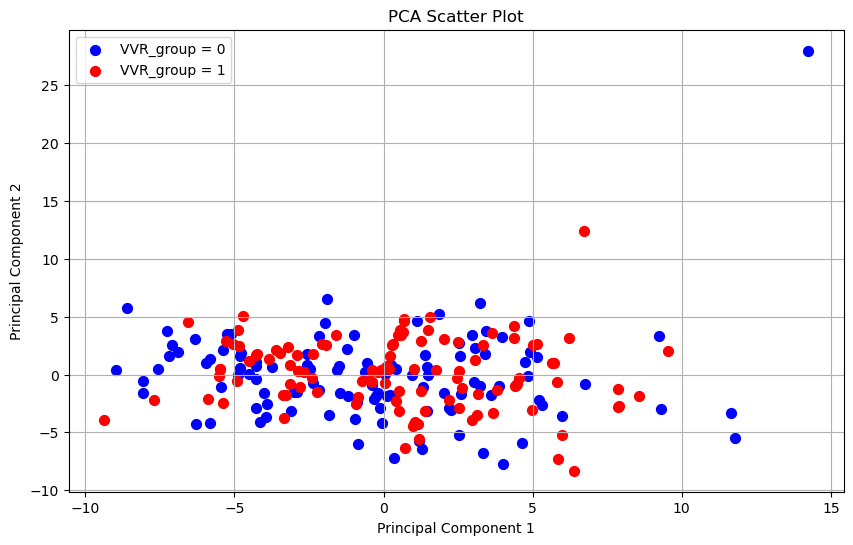

In [17]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()